In [ ]:
!git clone https://github.com/vkhoi/KTH-Action-Recognition.git

Cloning into 'KTH-Action-Recognition'...
remote: Enumerating objects: 233, done.
remote: Total 233 (delta 0), reused 0 (delta 0), pack-reused 233
Receiving objects: 100% (233/233), 709.16 KiB | 11.26 MiB/s, done.
Resolving deltas: 100% (148/148), done.


In [ ]:
%cd /content/KTH-Action-Recognition/dataset

/content/KTH-Action-Recognition/dataset


In [ ]:
!wget http://www.nada.kth.se/cvap/actions/boxing.zip
!wget http://www.nada.kth.se/cvap/actions/handclapping.zip
!wget http://www.nada.kth.se/cvap/actions/handwaving.zip
!wget http://www.nada.kth.se/cvap/actions/jogging.zip
!wget http://www.nada.kth.se/cvap/actions/running.zip
!wget http://www.nada.kth.se/cvap/actions/walking.zip

--2021-05-11 16:34:38--  http://www.nada.kth.se/cvap/actions/boxing.zip
Resolving www.nada.kth.se (www.nada.kth.se)... 130.237.28.41, 2001:6b0:1:11c2::82ed:1c29
Connecting to www.nada.kth.se (www.nada.kth.se)|130.237.28.41|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.csc.kth.se/cvap/actions/boxing.zip [following]
--2021-05-11 16:34:38--  https://www.csc.kth.se/cvap/actions/boxing.zip
Resolving www.csc.kth.se (www.csc.kth.se)... 130.237.28.41, 2001:6b0:1:11c2::82ed:1c29
Connecting to www.csc.kth.se (www.csc.kth.se)|130.237.28.41|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 194498294 (185M) [application/zip]
Saving to: ‘boxing.zip’

boxing.zip          100%[===================>] 185.49M  1.10MB/s    in 2m 52s  

2021-05-11 16:37:31 (1.08 MB/s) - ‘boxing.zip’ saved [194498294/194498294]

--2021-05-11 16:37:31--  http://www.nada.kth.se/cvap/actions/handclapping.zip
Resolving www.nada.kth.se (www.nada.kth.

In [ ]:
!unzip boxing.zip -d boxing
!unzip handclapping.zip -d handclapping
!unzip handwaving.zip -d handwaving
!unzip jogging.zip -d jogging
!unzip running.zip -d running
!unzip walking.zip -d walking

!rm *.zip

Archive:  boxing.zip
  inflating: boxing/person01_boxing_d1_uncomp.avi  
  inflating: boxing/person01_boxing_d2_uncomp.avi  
  inflating: boxing/person01_boxing_d3_uncomp.avi  
  inflating: boxing/person01_boxing_d4_uncomp.avi  
  inflating: boxing/person02_boxing_d1_uncomp.avi  
  inflating: boxing/person02_boxing_d2_uncomp.avi  
  inflating: boxing/person02_boxing_d3_uncomp.avi  
  inflating: boxing/person02_boxing_d4_uncomp.avi  
  inflating: boxing/person03_boxing_d1_uncomp.avi  
  inflating: boxing/person03_boxing_d2_uncomp.avi  
  inflating: boxing/person03_boxing_d3_uncomp.avi  
  inflating: boxing/person03_boxing_d4_uncomp.avi  
  inflating: boxing/person04_boxing_d1_uncomp.avi  
  inflating: boxing/person04_boxing_d2_uncomp.avi  
  inflating: boxing/person04_boxing_d3_uncomp.avi  
  inflating: boxing/person04_boxing_d4_uncomp.avi  
  inflating: boxing/person05_boxing_d1_uncomp.avi  
  inflating: boxing/person05_boxing_d2_uncomp.avi  
  inflating: boxing/person05_boxing_d3_unco

In [ ]:
!pip install pymoten

  Created wheel for pymoten: filename=pymoten-0.0.3-cp37-none-any.whl size=23302 sha256=c9d7d8667eaa78573f9d0ffd1e5612a2afeab3d3035cb4dcf7fec384ff7bc9ee
  Stored in directory: /root/.cache/pip/wheels/e6/23/19/3a87d6d1a21460b69e47aa925d3a37a2296654a4df49041b38
Successfully built pymoten


In [ ]:
##CODE FOR EXTRACTING OPTICALFLOW VALUES as features and clustering and DFT and storing as feature files all categories in one pickle file
import cv2
import numpy as np
import os
import pickle
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans


CATEGORIES = ["boxing", "handclapping", "handwaving", "jogging", "running", "walking"]

if __name__ == "__main__":

    # Create directory to store extracted SIFT features.
    os.makedirs("data", exist_ok=True)

    # Setup parameters for optical flow.
    farneback_params = dict(winsize = 20, iterations=1,
        flags=cv2.OPTFLOW_FARNEBACK_GAUSSIAN, levels=1,
        pyr_scale=0.5, poly_n=5, poly_sigma=1.1, flow=None)

    n_processed_files = 0
    features = []

    for category in CATEGORIES:
        print("Processing category %s" % category)

        # Get all files in current category's folder.
        folder_path = os.path.join("..", "dataset", category)
        filenames = os.listdir(folder_path)

        # List to store features. features[i] stores features for the i-th video
        # in current category.
        #features = []

        for filename in filenames:
            filepath = os.path.join("..", "dataset", category, filename)
            path = "/content/KTH-Action-Recognition/dataset/" + category + "/" + filename
            vid = cv2.VideoCapture(filepath)

            # Store features in current file.
            features_current_file = []

            prev_frame = None

            while vid.isOpened():
                ret, frame = vid.read()
                if not ret:
                    break

                # Only care about gray scale.
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

                if prev_frame is not None:
                    # Calculate optical flow.
                    flows = cv2.calcOpticalFlowFarneback(prev_frame, frame,
                        **farneback_params)

                    feature = []
                    for r in range(120):
                        if r % 10 != 0:
                            continue
                        for c in range(160):
                            if c % 10 != 0:
                                continue
                            feature.append(flows[r,c,0])
                            feature.append(flows[r,c,1])
                    feature = np.array(feature)

                    features_current_file.append(feature)

                prev_frame = frame
            
            kmeans = KMeans(n_clusters=10, init='k-means++', max_iter=300, n_init=10, random_state=0)
            pred_y = kmeans.fit_predict(features_current_file)

            #print(pred_y)
            feature_new = np.array(kmeans.cluster_centers_)
            print(feature_new)
            feature_new = cv2.dft(feature_new)           
            features.append({
                "filename": filename,
                "path" : path,
                "category": category,
                "features": feature_new 
            })

            n_processed_files += 1
            if n_processed_files % 30 == 0:
              print("Done %d files" % n_processed_files)

        # Dump data to file.
#pickle.dump(features, open("data/optflow_%s.p" % category, "wb"))
pickle.dump(features, open("data/optflow_cluster_4_dft.p" , "wb"))




Streaming output truncated to the last 5000 lines.
 [-0.00072309  0.00244349  0.02474852 ... -0.02132592  0.00049455
  -0.00471795]
 [-0.00066318  0.00097146  0.00042233 ... -0.01288554  0.00766393
  -0.0098441 ]
 [-0.00084387  0.00188708  0.00763654 ... -0.01012641 -0.02515423
  -0.01329225]]
[[ 5.37318859e-04  1.78298700e-03  1.45395606e-02 ... -1.05743461e-02
   7.17885417e-03 -6.99743263e-03]
 [ 4.42624630e-04  1.13065341e-03  1.61400974e-02 ...  5.37711659e-02
   3.69954073e-02  6.65162196e-02]
 [-1.60813389e-04  2.08218035e-03  1.39381205e-03 ... -2.29355662e-02
   1.73375007e-02 -1.33291833e-02]
 ...
 [-8.36783175e-04  1.76567757e-03  4.07732791e-04 ... -2.57070502e-02
   2.66327136e-02 -2.05539533e-02]
 [ 2.78416617e-05  1.55285074e-03  7.55708396e-03 ...  3.91423353e-03
   2.02013867e-02  1.04069819e-02]
 [-7.11296194e-04  1.34224034e-03 -1.34222492e-02 ... -1.83349829e-02
  -3.32047645e-03 -1.92941685e-02]]
[[ 1.07874297e-05  6.78992052e-05 -7.36761080e-04 ...  4.90834245e-03

In [ ]:
#CODE FOR EXTRACTING ENERGY MOTION FEATURES as features and storing as feature files all categories in one pickle file

import cv2
import numpy as np
import os
import pickle
import moten

CATEGORIES = ["boxing", "handclapping", "handwaving", "jogging", "running", "walking"]

if __name__ == "__main__":

    # Create directory to store extracted pixel features.
    os.makedirs("data", exist_ok=True)

    
    n_processed_files = 0
    features = []

    for category in CATEGORIES:
        print("Processing category %s" % category)

        # Get all files in current category's folder.
        folder_path = os.path.join("..", "dataset", category)
        filenames = os.listdir(folder_path)

        # List to store features. features[i] stores features for the i-th video
        # in current category.
        #features = []

        for filename in filenames:
            filepath = os.path.join("..", "dataset", category, filename)
            path = "/content/KTH-Action-Recognition/dataset/" + category + "/" + filename
            vid = cv2.VideoCapture(filepath)

            # Store features in current file.
            luminance_images = moten.io.video2luminance(path, nimages=200)

# Create a pyramid of spatio-temporal gabor filters
            nimages, vdim, hdim = luminance_images.shape
            pyramid = moten.get_default_pyramid(vhsize=(vdim, hdim), fps=24)

# Compute motion energy features
            moten_features = pyramid.project_stimulus(luminance_images)
            features_current_file = moten_features
            features.append({
                "filename": filename,
                "path" : path,
                "category": category,
                "features": features_current_file 
            })

            n_processed_files += 1
            if n_processed_files % 30 == 0:
                print("Done %d files" % n_processed_files)

        # Dump data to file.
pickle.dump(features, open("data/energy_motion_feat.p" , "wb"))





moten.io.video2luminance: 0it [00:00, ?it/s]
moten.io.video2luminance: 12it [00:00, 111.01it/s]

Processing category boxing



moten.io.video2luminance: 23it [00:00, 109.71it/s]
moten.io.video2luminance: 34it [00:00, 109.07it/s]
moten.io.video2luminance: 44it [00:00, 106.15it/s]
moten.io.video2luminance: 55it [00:00, 106.83it/s]
moten.io.video2luminance: 66it [00:00, 106.81it/s]
moten.io.video2luminance: 77it [00:00, 105.61it/s]
moten.io.video2luminance: 88it [00:00, 106.55it/s]
moten.io.video2luminance: 99it [00:00, 106.26it/s]
moten.io.video2luminance: 110it [00:01, 106.07it/s]
moten.io.video2luminance: 122it [00:01, 107.42it/s]
moten.io.video2luminance: 133it [00:01, 107.71it/s]
moten.io.video2luminance: 144it [00:01, 106.87it/s]
moten.io.video2luminance: 155it [00:01, 106.81it/s]
moten.io.video2luminance: 166it [00:01, 106.00it/s]
moten.io.video2luminance: 177it [00:01, 106.99it/s]
moten.io.video2luminance: 188it [00:01, 106.49it/s]
moten.io.video2luminance: 200it [00:01, 106.26it/s]

project_stimulus: 100%|██████████| 1840/1840 [00:10<00:00, 174.87it/s]

moten.io.video2luminance: 0it [00:00, ?it/s]
moten

Done 30 files


Streaming output truncated to the last 5000 lines.
project_stimulus: 100%|██████████| 1840/1840 [00:13<00:00, 131.79it/s]

moten.io.video2luminance: 0it [00:00, ?it/s]
moten.io.video2luminance: 8it [00:00, 74.12it/s]
moten.io.video2luminance: 17it [00:00, 76.78it/s]
moten.io.video2luminance: 26it [00:00, 79.39it/s]
moten.io.video2luminance: 36it [00:00, 82.90it/s]
moten.io.video2luminance: 45it [00:00, 84.58it/s]
moten.io.video2luminance: 53it [00:00, 81.24it/s]
moten.io.video2luminance: 62it [00:00, 83.61it/s]
moten.io.video2luminance: 72it [00:00, 86.47it/s]
moten.io.video2luminance: 81it [00:00, 84.44it/s]
moten.io.video2luminance: 90it [00:01, 85.86it/s]
moten.io.video2luminance: 99it [00:01, 86.64it/s]
moten.io.video2luminance: 108it [00:01, 85.65it/s]
moten.io.video2luminance: 118it [00:01, 88.45it/s]
moten.io.video2luminance: 128it [00:01, 90.73it/s]
moten.io.video2luminance: 138it [00:01, 90.15it/s]
moten.io.video2luminance: 148it [00:01, 90.92it/s]
moten.io.video2luminance: 15

Done 60 files


Streaming output truncated to the last 5000 lines.
project_stimulus: 100%|██████████| 1840/1840 [00:18<00:00, 100.98it/s]

moten.io.video2luminance: 0it [00:00, ?it/s]
moten.io.video2luminance: 4it [00:00, 38.40it/s]
moten.io.video2luminance: 10it [00:00, 42.78it/s]
moten.io.video2luminance: 19it [00:00, 50.06it/s]
moten.io.video2luminance: 28it [00:00, 56.90it/s]
moten.io.video2luminance: 37it [00:00, 63.24it/s]
moten.io.video2luminance: 46it [00:00, 68.37it/s]
moten.io.video2luminance: 55it [00:00, 72.23it/s]
moten.io.video2luminance: 64it [00:00, 75.36it/s]
moten.io.video2luminance: 72it [00:00, 76.48it/s]
moten.io.video2luminance: 80it [00:01, 75.74it/s]
moten.io.video2luminance: 88it [00:01, 74.29it/s]
moten.io.video2luminance: 97it [00:01, 77.32it/s]
moten.io.video2luminance: 106it [00:01, 79.34it/s]
moten.io.video2luminance: 115it [00:01, 81.02it/s]
moten.io.video2luminance: 124it [00:01, 82.52it/s]
moten.io.video2luminance: 133it [00:01, 83.27it/s]
moten.io.video2luminance: 142

In [ ]:
print(len(features))
print(features[0])

Streaming output truncated to the last 5000 lines.
       -8.99925753e-02, -1.98256448e-02, -1.49136418e-02,  9.43696871e-02,
        2.46602464e-02,  1.48118839e-01, -4.97440696e-02,  5.52135855e-02,
       -4.83681709e-02,  2.33923141e-02, -8.83796364e-02,  3.50250565e-02,
       -8.86502117e-02,  2.31478531e-02, -1.47019364e-02,  4.47973981e-02,
        3.49616893e-02,  5.92464954e-02,  3.56813110e-02,  4.51624729e-02,
       -1.05801769e-01,  9.89899114e-02, -2.50607908e-01, -1.04750870e-02,
       -6.98700026e-02,  1.78170186e-02, -1.93593472e-01, -9.92738269e-03],
      dtype=float32), array([ 4.33961162e-04,  5.73866018e-05,  2.31401320e-03,  1.23301577e-02,
       -8.59348252e-02, -4.68572304e-02,  1.16921589e-01, -1.55399954e-02,
       -3.66961956e-02,  7.76324654e-03, -8.16591084e-03,  1.04416069e-02,
       -6.62109032e-02,  3.22602652e-02,  4.96458970e-02,  2.09917083e-01,
        4.33337176e-03,  1.29164591e-01,  1.05236925e-01,  8.72371048e-02,
       -9.45274811e-03,  1

In [ ]:
#CBVR SAMPLE TEST BENCH FOR PIXEL BASED COMPARISONS
#Accessing the feature database
import pickle
import cv2
import numpy as np
import pandas as pd
from pandas import DataFrame


# List to store result
feature_result = []

#CODE TO EXTRACT FEATURES FROM QUERY IMAGE


#QUERY VIDEO
filepath = '/content/KTH-Action-Recognition/dataset/boxing/person01_boxing_d1_uncomp.avi'
vid = cv2.VideoCapture(filepath)

            # Store features in current file.
features_current_file_new = []
count_frame = 0
while vid.isOpened():
  ret, frame = vid.read()
  count_frame = count_frame + 1
  if not ret:
    break
  if(count_frame < 2):
  # Only care about gray scale.
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(frame,100,200)
    
                
    features_current_file_new.append(edges)
    features_current_file = np.array(features_current_file_new)

# No of frames
print(len(features_current_file))  
            

            





# open a file, where you stored the pickled data
file = open('/content/KTH-Action-Recognition/dataset/data/pixelkf1_edges.p', 'rb')

# dump information to that file
data = pickle.load(file)

# close the file
file.close()

print('Showing the pickled data:')


cnt = 0
for item in data:
    #print('The data ', cnt, ' is : ', item['path'])
    print('The data ', cnt, ' is : ', len(item['features']))

    
    point_a = np.array(item['features'])
    point_b = np.array(features_current_file)

    distance = np.linalg.norm(point_a - point_b)
    print(distance)
    
    feature_result.append({
                
                "path" : item['path'],
                "similarity" : distance,
                "category" : item['category'] 
            })

    cnt += 1

print(feature_result)
df = DataFrame (feature_result)
print (df)



df1 = df.sort_values(by=['similarity'])
print(df1)



1
Showing the pickled data:
The data  0  is :  1
4784.258249718549
The data  1  is :  1
5925.689580124831
The data  2  is :  1
4064.070004318331
The data  3  is :  1
6395.389823927858
The data  4  is :  1
3858.8916802626113
The data  5  is :  1
6466.171742228937
The data  6  is :  1
5016.472565458721
The data  7  is :  1
4818.116229399204
The data  8  is :  1
8015.297748680332
The data  9  is :  1
5842.811651936078
The data  10  is :  1
3756.4299540920497
The data  11  is :  1
6098.739869841966
The data  12  is :  1
5831.670086690433
The data  13  is :  1
4784.256786586607
The data  14  is :  1
4327.525389873525
The data  15  is :  1
6466.172206181954
The data  16  is :  1
5985.742059260489
The data  17  is :  1
6615.297650143945
The data  18  is :  1
6451.072623990525
The data  19  is :  1
5798.124783065642
The data  20  is :  1
6007.426653734526
The data  21  is :  1
5300.103489555652
The data  22  is :  1
7158.212276818843
The data  23  is :  1
4446.111896927471
The data  24  is :  

In [ ]:
#CBVR SAMPLE TEST BENCH FOR OPTICAL FLOW + Clustering+Discrete Fourier Transform BASED COMPARISONS
#Accessing the feature database
import pickle
import cv2
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans



# List to store result
feature_result = []

#CODE TO EXTRACT FEATURES FROM QUERY IMAGE


#QUERY VIDEO
#QUERY VIDEO
# Setup parameters for optical flow.


# Setup parameters for optical flow.
farneback_params = dict(winsize = 20, iterations=1,
        flags=cv2.OPTFLOW_FARNEBACK_GAUSSIAN, levels=1,
        pyr_scale=0.5, poly_n=5, poly_sigma=1.1, flow=None)

#QUERY VIDEO
filepath = '/content/KTH-Action-Recognition/dataset/boxing/person01_boxing_d1_uncomp.avi'
vid = cv2.VideoCapture(filepath)

            # Store features in current file.
features_current_file_new = []
count_frame = 0
prev_frame = None
while vid.isOpened():
  ret, frame = vid.read()
  count_frame = count_frame + 1
  if not ret:
    break
  # Only care about gray scale.
  frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  #print(frame)
  if(prev_frame is not None):

    flows = cv2.calcOpticalFlowFarneback(prev_frame, frame,**farneback_params)
    #print(flows)
    feature = []
    for r in range(120):
      if r % 10 != 0:
        continue
      for c in range(160):
          if c % 10 != 0:
            continue
          feature.append(flows[r,c,0])
          feature.append(flows[r,c,1])
    feature = np.array(feature)
    features_current_file_new.append(feature)
  prev_frame = frame

features_current_file_new = np.array(features_current_file_new)
print((features_current_file_new))
print(len(features_current_file_new))

kmeans = KMeans(n_clusters=10, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(features_current_file_new)

#print(pred_y)
feature_new = np.array(kmeans.cluster_centers_)
print(feature_new)
feature_new = cv2.dft(feature_new)






# open a file, where you stored the pickled data
file = open('/content/KTH-Action-Recognition/dataset/data/optflow_cluster_4_dft.p', 'rb')

# dump information to that file
data = pickle.load(file)

# close the file
file.close()

print('Showing the pickled data:')


cnt = 0
for item in data:
    #print('The data ', cnt, ' is : ', item['path'])
    print('The data ', cnt, ' is : ', len(item['features']))

    
    point_a = np.array(item['features'])
    point_b = np.array(feature_new)

    distance = np.linalg.norm(point_a - point_b)
    print(distance)
    
    feature_result.append({
                
                "path" : item['path'],
                "similarity" : distance,
                "category" : item['category'] 
            })

    cnt += 1

print(feature_result)
df = DataFrame (feature_result)
print (df)



df1 = df.sort_values(by=['similarity'])
print(df1)



[[ 7.8166826e-03  3.4231893e-03  2.6740524e-01 ... -4.8670912e-01
   6.2397450e-01 -4.9285766e-01]
 [-4.0252600e-03 -1.1776921e-03 -1.5639985e-01 ... -4.0303272e-01
   6.3305277e-01 -2.5876136e-02]
 [ 4.5227460e-03  1.3972573e-03  4.1264611e-01 ... -1.6061094e-01
   1.0275143e+00 -4.1646546e-01]
 ...
 [ 3.0660150e-03  1.3695725e-03 -9.4729196e-04 ...  1.2635972e-01
   3.1656723e-02  1.4707133e-01]
 [ 2.2545261e-03 -9.3073258e-04 -2.9423307e-03 ...  1.6303776e-02
   1.4981611e-01  2.8002553e-02]
 [ 2.7173855e-03  1.3366659e-03  9.8391704e-02 ...  1.7796101e-01
   6.6315785e-02  2.7740267e-01]]
359
[[ 1.1539563e-03  1.8488292e-03  3.5663366e-02 ...  1.0546727e-02
   1.0727763e-02  7.3367315e-03]
 [ 1.1550428e-03  2.0389501e-03  6.1322730e-03 ...  3.0613754e-02
   7.4780537e-03  2.7983749e-02]
 [ 9.4053533e-04  1.3267327e-03  9.8430179e-03 ...  2.2618741e-02
  -4.9050003e-03  7.6177316e-03]
 ...
 [ 4.8472192e-03  1.4996820e-03  1.7184135e-01 ... -2.6659614e-01
   6.2182665e-01 -2.5006682e

In [ ]:
#MEAN AVERAGE PRECISION
import matplotlib.pyplot as plt

TP = 0

Total = len(df1) 
print(Total)
res = []
query = 'boxing'
#for i in range(0,Total):
for index, row in df1.iterrows():
  #print(row['category'])
  res.append(row['category'])
print(res)
print(len(res))

map = []
for i in range(0,len(res)):
  if(res[i] == query):
    map.append(1)
  else:
    map.append(0)

print(map)  

map_fet = []
mar_fet = []
mTP = 0

mTR = 0
for i in range(0,len(map)):
  TP = TP + map[i]
  mTP = TP / (i+1)
  mTR = TP / (100)
  map_fet.append(mTP)
  mar_fet.append(mTR)
  mTP = 0



print(map_fet)
print(mar_fet)



599
['boxing', 'handclapping', 'boxing', 'boxing', 'handclapping', 'handclapping', 'boxing', 'handclapping', 'boxing', 'handclapping', 'handclapping', 'handclapping', 'boxing', 'handclapping', 'handclapping', 'boxing', 'boxing', 'handclapping', 'handclapping', 'boxing', 'handclapping', 'handclapping', 'handclapping', 'boxing', 'boxing', 'boxing', 'handclapping', 'handclapping', 'handclapping', 'boxing', 'boxing', 'handclapping', 'boxing', 'boxing', 'handclapping', 'handclapping', 'boxing', 'handclapping', 'boxing', 'boxing', 'handclapping', 'boxing', 'boxing', 'boxing', 'handclapping', 'handclapping', 'boxing', 'handclapping', 'walking', 'handclapping', 'handclapping', 'boxing', 'boxing', 'handclapping', 'boxing', 'handclapping', 'handclapping', 'handclapping', 'handclapping', 'boxing', 'handclapping', 'boxing', 'handclapping', 'handclapping', 'boxing', 'handclapping', 'boxing', 'boxing', 'boxing', 'boxing', 'handclapping', 'handclapping', 'boxing', 'handclapping', 'boxing', 'walking',

[[45 47  2  0  0  6]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]]


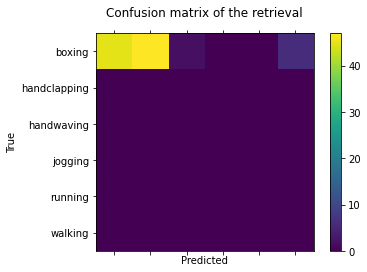

In [ ]:
#CONFUSION MATRIX
# Importing the dependancies
from sklearn import metrics
# Predicted values

y_pred = []
y_act = []
#y_pred = ["boxing", "boxing", "handclapping", "boxing", "handclapping"]

for i in range(0,100):
  y_pred.append(res[i])

# Actual values
#y_act = ["boxing", "boxing", "boxing", "boxing", "boxing"]

for i in range(0,100):
  y_act.append("boxing")
# Printing the confusion matrix
# The columns will show the instances predicted for each label,
# and the rows will show the actual number of instances for each label.
labels=["boxing", "handclapping", "handwaving", "jogging", "running", "walking"]
print(metrics.confusion_matrix(y_act, y_pred, labels))
# Printing the precision and recall, among other metrics
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(metrics.confusion_matrix(y_act, y_pred, labels))
plt.title('Confusion matrix of the retrieval')
fig.colorbar(cax)
ax.set_xticklabels([''])
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
#print(metrics.classification_report(y_act, y_pred, labels=["boxing", "handclapping", "handwaving", "jogging", "running", "walking"]))

[[14  6]
 [ 0  0]]


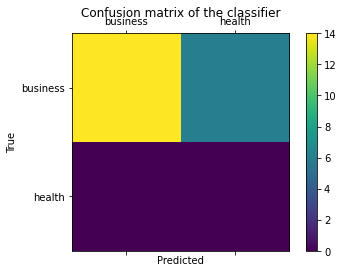

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt


y_test=['business', 'business', 'business', 'business', 'business',
        'business', 'business', 'business', 'business', 'business',
        'business', 'business', 'business', 'business', 'business',
        'business', 'business', 'business', 'business', 'business']
pred=['health', 'business', 'business', 'business', 'business',
       'business', 'health', 'health', 'business', 'business', 'business',
       'business', 'business', 'business', 'business', 'business',
       'health', 'health', 'business', 'health']


labels = ['business', 'health']
cm = confusion_matrix(y_test, pred, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
#CONFUSION MATRIX
# Importing the dependancies
from sklearn import metrics
# Predicted values
y_pred = ["a", "b", "c", "a", "b"]
# Actual values
y_act = ["a", "b", "c", "c", "a"]
# Printing the confusion matrix
# The columns will show the instances predicted for each label,
# and the rows will show the actual number of instances for each label.
print(metrics.confusion_matrix(y_act, y_pred, labels=["a", "b", "c"]))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_act, y_pred, labels=["a", 
"b","c"]))

[[1 1 0]
 [0 1 0]
 [1 0 1]]
              precision    recall  f1-score   support

           a       0.50      0.50      0.50         2
           b       0.50      1.00      0.67         1
           c       1.00      0.50      0.67         2

    accuracy                           0.60         5
   macro avg       0.67      0.67      0.61         5
weighted avg       0.70      0.60      0.60         5



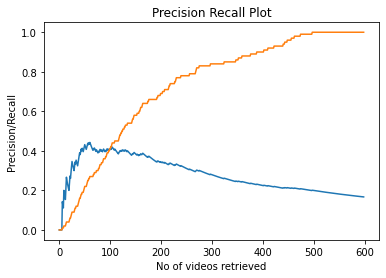

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import math #needed for definition of pi
x = np.arange(0, len(res), 1)
y1 = map_fet
y2 = mar_fet
plt.plot(x,y1)
plt.plot(x,y2)
plt.xlabel("No of videos retrieved")
plt.ylabel("Precision/Recall")
plt.title('Precision Recall Plot')
plt.show()

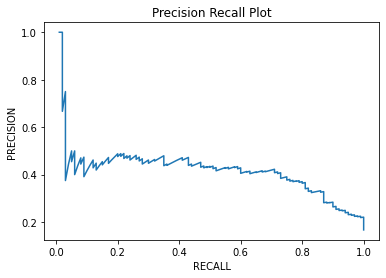

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import math #needed for definition of pi
x = np.arange(0, len(res), 1)
y1 = map_fet
y2 = mar_fet
#plt.plot(x,y1)
plt.plot(y2,y1)
plt.xlabel("RECALL")
plt.ylabel("PRECISION")
plt.title('Precision Recall Plot')
plt.show()